In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import EmotionEvaluationCorrelationHelper as helper
import matplotlib.pyplot as plt
import matplotlib
from IPython.core.pylabtools import figsize
from matplotlib.colors import ListedColormap
import scipy.stats as stats
from labellines import labelLine, labelLines

In [2]:
df_study_1 = pd.read_csv('../../Data/study1_olr.csv', delimiter='\t')
df_study_2 = pd.read_csv('../../Data/study2_olr.csv', delimiter='\t')
df_study_3 = pd.read_csv('../../Data/study3_olr.csv', delimiter='\t')
df_study_4 = pd.read_csv('../../Data/study4_olr_formatted.csv', delimiter=',')

In [3]:
#enforcing consistent naming conventions for emotion concepts
df_study_1 = df_study_1.rename(str,columns={"ExcitedPleasant":"ExcitementPleasant",
                                            "ExcitedGood":"ExcitementGood",
                                           "SurprisedGood":"SurpriseGood",
                                           "SurprisedPleasant":"SurprisePleasant"})
df_study_2 = df_study_2.rename(str,columns={"SadnessPleasant":"SadPleasant",
                                            "SadnessGood":"SadGood"})
df_study_4 = df_study_4.rename(str,columns={"HappyPleasant":"HappinessPleasant",
                                            "HappyGood":"HappinessGood",
                                            "SadnessPleasant":"SadPleasant",
                                            "SadnessGood":"SadGood"})

#concat all data
all_data = pd.concat([df_study_1,df_study_2,df_study_4])
#get correlations and sort
all_study_corrs = helper.getPairwiseCorrelations(all_data,'Good','Pleasant')
sorted_all_study_corrs = all_study_corrs.sort_values('corr_val_dim',
                                                ascending=True
                                                 ).reset_index(drop=True)

def getMeanDiff(val_1,val_2,emotion,df):
    col_1 = emotion+val_1
    col_2 = emotion+val_2
    return abs(df[col_1].mean() - df[col_2].mean())

sorted_all_study_corrs['Mean Difference']=np.NAN
value_dimension_1 = 'Pleasant'
emotions = [i.split(value_dimension_1)[0] for i in all_data.columns if len(i.split(value_dimension_1))>1]
for emotion in emotions:
    index = sorted_all_study_corrs.loc[sorted_all_study_corrs['emotions']==emotion].index
    mean_diff = getMeanDiff('Pleasant','Good',emotion,all_data)
    sorted_all_study_corrs.loc[index,'Mean Difference']=mean_diff

sorted_all_study_corrs['Dissimilarity Score']=(1-sorted_all_study_corrs['corr_val_dim'])/2

/Users/phoenix/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


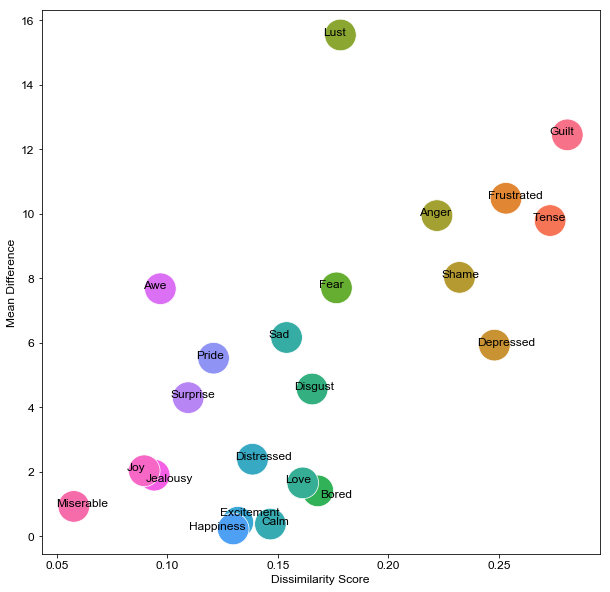

In [4]:
figsize(10,10)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        emo_str = str(point['val'])
        x_cordinate=point['x']
        x_default_offset = .004
        x_cord = x_cordinate- x_default_offset
        y_cord = point['y']
        if(emo_str=='Happiness'):
            ax.text(point['x']-.02, y_cord-.001, str(point['val']))
        elif(emo_str=='Calm'):
            ax.text(x_cord, y_cord, str(point['val']))
        elif(emo_str=='Excitement'):
            ax.text(x_cord-.004, y_cord+.2, str(point['val']))
        elif(emo_str=='Jealousy'):
            ax.text(x_cord, y_cord-.2, str(point['val']))
        elif(emo_str=='Bored'):
            ax.text(x_cord+.005, y_cord-.2, str(point['val']))
        else:
            ax.text(x_cord-.004, y_cord, str(point['val']))

plt.rcParams['font.family']="Arial" 
plt.rcParams['font.size']="12" 
scatter_plt = sns.scatterplot(x='Dissimilarity Score',
                y='Mean Difference', 
                hue='emotions',
                data=sorted_all_study_corrs,
                s=1000,
               legend=False)
label_point(sorted_all_study_corrs['Dissimilarity Score'],
           sorted_all_study_corrs['Mean Difference'],
           sorted_all_study_corrs['emotions'],
           scatter_plt)
